Let's focus on the **vanishing gradient problem**, and how different activation functions address it.

### **1. Sigmoid Activation Function**

- **Sigmoid Formula**: 
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$
  
- **Characteristics**:
  - Outputs values in the range (0, 1).
  - Historically used in neural networks, especially for binary classification.

- **Vanishing Gradient Problem**:
  - **What is the vanishing gradient problem?**: When the gradients during backpropagation become very small, making the weight updates close to zero. This causes the training to slow down or completely stop, especially in deep networks.
  - **Why it happens with sigmoid**: The sigmoid function squashes its input into a narrow range (0, 1). For very large or very small inputs, the gradient (the slope of the function) becomes **almost zero**. When this happens in deeper layers of the network, the gradient diminishes as it propagates backward, effectively stopping the learning process.
  
  This is why the sigmoid function is **not ideal for hidden layers**, as it can exacerbate the vanishing gradient problem, slowing down learning in deeper networks.



### The Vanishing Gradient Problem:
- The **vanishing gradient problem** occurs when the gradients (derivatives) of the loss function with respect to the weights become very small during backpropagation, especially in deep networks. This small gradient results in very small weight updates, effectively slowing down or halting the learning process.
- The **sigmoid** function is particularly susceptible to this problem because its derivative becomes very small for large positive or negative input values, especially in deeper layers where the gradients are propagated back through many layers.

### Step-by-Step Example:

#### 1. **Sigmoid Function**:
We use the sigmoid activation function to demonstrate this. The sigmoid function has the formula:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

For very large positive values of $$x$$, the sigmoid approaches 1, and for very large negative values of $$x$$, it approaches 0. The gradient (or derivative) of the sigmoid is small in both of these regions.

#### 2. **Sigmoid Derivative**:
The derivative of the sigmoid function, which we use for calculating gradients in backpropagation, is:
$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

This derivative becomes very small when the sigmoid output is either close to 0 or close to 1, leading to the vanishing gradient problem.

Let's simulate this and demonstrate the vanishing gradients.

### Code Demonstration:

```python
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# Range of input values
x = np.linspace(-10, 10, 1000)

# Calculate sigmoid outputs and their derivatives
sigmoid_outputs = sigmoid(x)
sigmoid_gradients = sigmoid_derivative(x)

# Plotting the sigmoid function and its derivative
plt.figure(figsize=(12, 6))

# Sigmoid function plot
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_outputs, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('Input (x)')
plt.ylabel('Sigmoid Output')
plt.grid(True)

# Sigmoid derivative plot
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_gradients, label='Sigmoid Derivative', color='red')
plt.title('Sigmoid Derivative (Gradient)')
plt.xlabel('Input (x)')
plt.ylabel('Sigmoid Gradient')
plt.grid(True)

# Show plots
plt.show()
```

### Explanation of Results:

1. **Sigmoid Function** (Left Plot):
   - The sigmoid function maps input values to the range (0, 1). For large negative inputs, the sigmoid output is near 0, and for large positive inputs, the output is near 1.

2. **Sigmoid Derivative** (Right Plot):
   - The derivative (gradient) of the sigmoid function is high near the center (around $x = 0$) but becomes very small when $x$ is large (positive or negative). As $x$ moves towards very large positive or negative values, the gradient approaches zero.

#### **Vanishing Gradient Problem**:
- During backpropagation, the gradients are used to adjust the weights. When the derivative of the activation function (like sigmoid) becomes very small, the gradients for those weights become tiny. This results in minimal or no updates to the weights, causing **learning to stall** or **slow down** significantly.
  
- In deeper networks, where gradients are propagated backward through many layers, these tiny gradients **compound**, leading to very small updates for the earlier layers, which is why the **vanishing gradient problem** is especially severe in deep networks.

### Solution to Vanishing Gradient Problem:
- Activation functions like **ReLU** (Rectified Linear Unit) are less prone to this issue because their derivatives don't approach zero as quickly (for positive values of $$x$$).
- Other variants like **Leaky ReLU** and **ELU** have also been introduced to help mitigate the vanishing gradient problem.



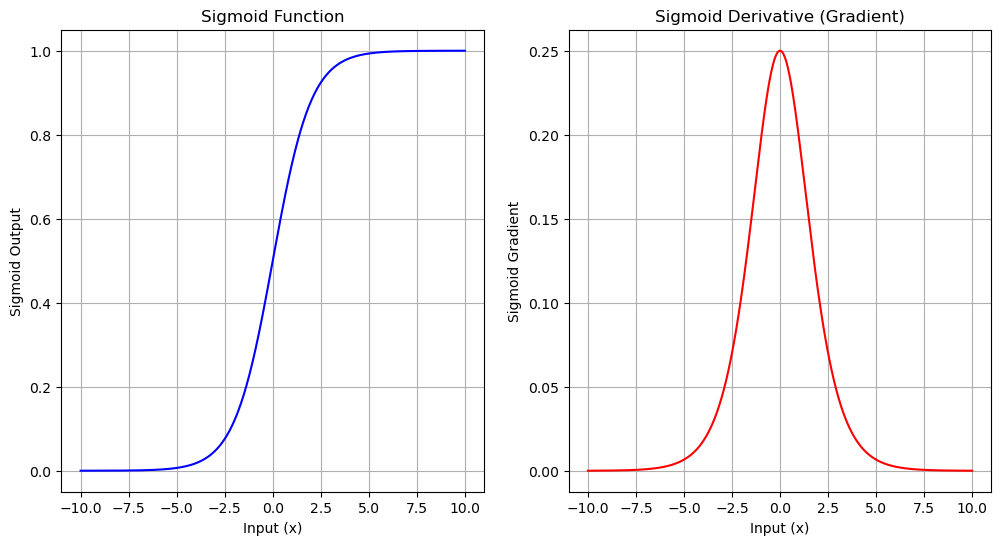

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid


def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)


# Range of input values
x = np.linspace(-10, 10, 1000)

# Calculate sigmoid outputs and their derivatives
sigmoid_outputs = sigmoid(x)
sigmoid_gradients = sigmoid_derivative(x)

# Plotting the sigmoid function and its derivative
plt.figure(figsize=(12, 6))

# Sigmoid function plot
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_outputs, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('Input (x)')
plt.ylabel('Sigmoid Output')
plt.grid(True)

# Sigmoid derivative plot
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_gradients, label='Sigmoid Derivative', color='red')
plt.title('Sigmoid Derivative (Gradient)')
plt.xlabel('Input (x)')
plt.ylabel('Sigmoid Gradient')
plt.grid(True)

# Show plots
plt.show()

In [36]:
print(sigmoid(-10))
print(sigmoid_derivative(-13.5))

4.5397868702434395e-05
1.3709553273341817e-06


### **2. Tanh Activation Function**

- **Tanh Formula**:
  $$
  \tanh(x) = \frac{2}{1 + e^{-2x}} - 1
  $$
  
- **Characteristics**:
  - Outputs values in the range (-1, 1).
  - **Centers data around zero**: Unlike the sigmoid function (which outputs values between 0 and 1), `tanh` outputs values between -1 and 1. This is beneficial because it centers the data around zero, which often leads to faster convergence during training.

- **Vanishing Gradient Problem**:
  - Like the sigmoid, the **tanh function** also suffers from the vanishing gradient problem. For very large or small inputs, the gradient of `tanh` becomes very small, which leads to slow learning. However, `tanh` is usually preferred over sigmoid for hidden layers because its output is zero-centered, helping the network converge faster compared to the sigmoid function.


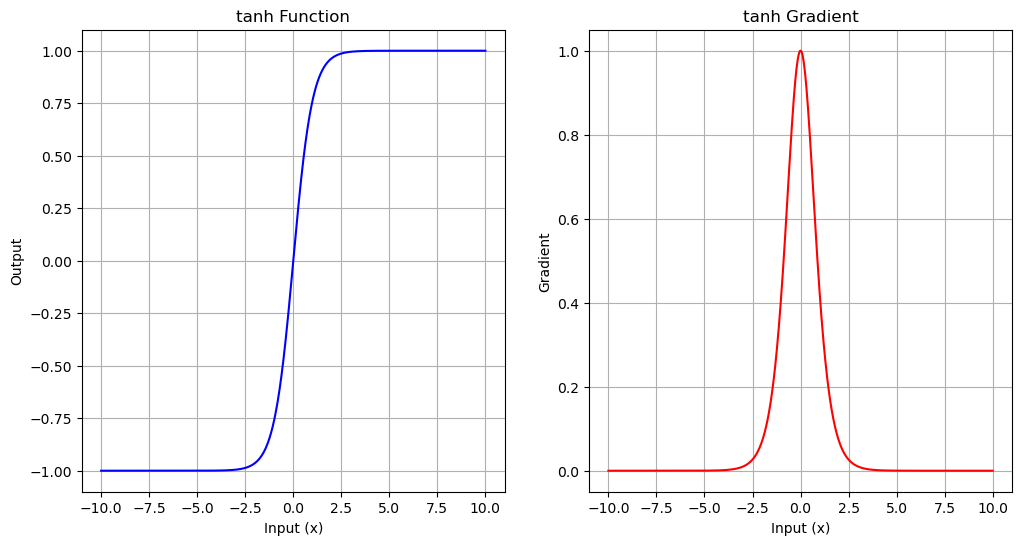

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tanh function


def tanh(x):
    return np.tanh(x)

# Derivative of tanh function (the gradient)


def tanh_derivative(x):
    return 1 - np.tanh(x)**2


# Range of input values
x = np.linspace(-10, 10, 1000)

# Calculate tanh outputs and their derivatives
tanh_values = tanh(x)
tanh_gradients = tanh_derivative(x)

# Plotting the tanh function and its derivative
plt.figure(figsize=(12, 6))

# Plot for the tanh function
plt.subplot(1, 2, 1)
plt.plot(x, tanh_values, label="tanh", color="blue")
plt.title("tanh Function")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.grid(True)

# Plot for the gradient of the tanh function
plt.subplot(1, 2, 2)
plt.plot(x, tanh_gradients, label="tanh Gradient", color="red")
plt.title("tanh Gradient")
plt.xlabel("Input (x)")
plt.ylabel("Gradient")
plt.grid(True)

plt.show()

In [35]:
print(f'tanh {tanh(.001)}')
print(f'tanh_derivative {tanh_derivative(-13.5)}')

tanh 0.0009999996666668
tanh_derivative 7.518208278156635e-12



### **3. ReLU (Rectified Linear Unit)**

- **ReLU Formula**:
  $$
  \text{ReLU}(x) = \max(0, x)
  $$

- **Characteristics**:
  - Outputs 0 if the input is negative and outputs the input if it is positive (i.e., no activation for negative inputs).
  - **Mitigates the vanishing gradient problem**: Unlike sigmoid and tanh, ReLU doesn't squash the input into a narrow range. For positive inputs, its gradient is constant and doesn't shrink, which helps mitigate the vanishing gradient problem and allows for faster training.
  
- **Dying ReLU Problem**:
  - **What is the dying ReLU problem?**: Neurons can "die" during training if they consistently receive negative inputs, causing their outputs to be zero. This leads to a gradient of zero, so these neurons stop contributing to the learning process. When this happens to a large number of neurons, it can degrade the network's performance.


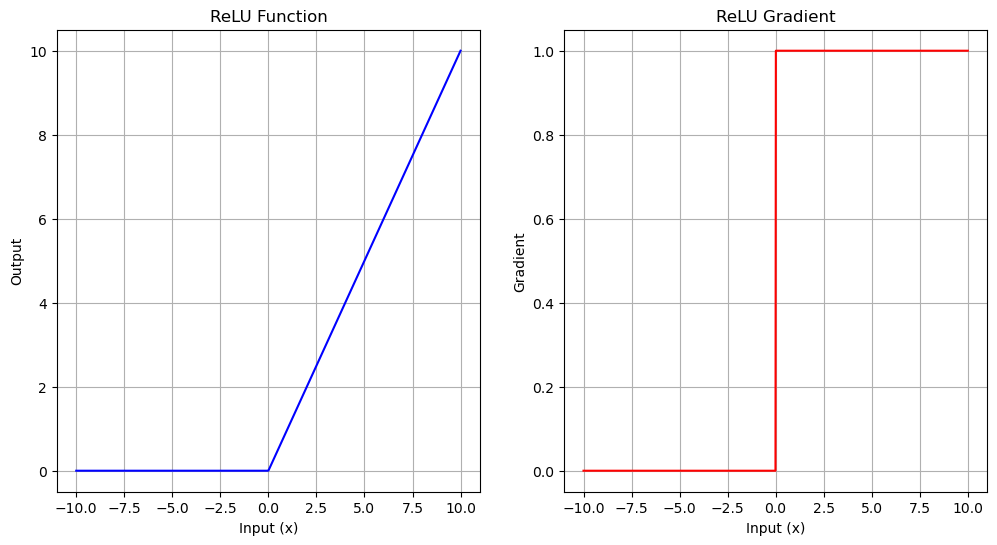

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function


def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU function (the gradient)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)


# Range of input values
x = np.linspace(-10, 10, 1000)

# Calculate ReLU outputs and their derivatives
relu_values = relu(x)
relu_gradients = relu_derivative(x)

# Plotting the ReLU function and its derivative
plt.figure(figsize=(12, 6))

# Plot for the ReLU function
plt.subplot(1, 2, 1)
plt.plot(x, relu_values, label="ReLU", color="blue")
plt.title("ReLU Function")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.grid(True)

# Plot for the gradient of the ReLU function
plt.subplot(1, 2, 2)
plt.plot(x, relu_gradients, label="ReLU Gradient", color="red")
plt.title("ReLU Gradient")
plt.xlabel("Input (x)")
plt.ylabel("Gradient")
plt.grid(True)

plt.show()

In [6]:
relu(-10000)

0


### **4. Leaky ReLU (Leaky Rectified Linear Unit)**

- **Leaky ReLU Formula**:
  $$
  \text{Leaky ReLU}(x) = \begin{cases} 
  x & \text{if } x > 0 \\
  \alpha x & \text{if } x \leq 0 
  \end{cases}
  $$
  Where `α` is a small constant (e.g., 0.01).

- **Characteristics**:
  - Like ReLU, Leaky ReLU allows positive values to pass unchanged. However, for negative inputs, instead of setting them to zero, it allows a small non-zero gradient (via `α x`).
  - **Mitigates the dying ReLU problem**: Because Leaky ReLU allows a small gradient for negative inputs, it reduces the likelihood of neurons "dying" (i.e., having zero gradients and never updating).

### **5. ELU (Exponential Linear Unit)**

- **ELU Formula**:
  $$
  \text{ELU}(x) = \begin{cases} 
  x & \text{if } x > 0 \\
  \alpha (e^x - 1) & \text{if } x \leq 0 
  \end{cases}
  $$

- **Characteristics**:
  - Similar to ReLU for positive values (`x` if `x > 0`).
  - For negative values, instead of a straight line (like Leaky ReLU), it curves exponentially (with `α` controlling the curvature).
  - **Combines benefits of ReLU and mitigates the dying ReLU problem**: ELU retains the fast training of ReLU but reduces the dying neuron problem by having a non-zero gradient for negative inputs, while also allowing a more natural negative output for negative inputs (which can sometimes improve training).
  
### **Vanishing Gradient Problem Recap**
- **Vanishing gradient**: Occurs when the gradients become very small during backpropagation. If the gradient is close to zero, the weights of earlier layers are updated very slowly or not at all. This is common in activation functions like **sigmoid** and **tanh**, where the output is squashed into a small range, causing the gradient to shrink as it moves backward through the network.

- **ReLU, Leaky ReLU, and ELU mitigate this**: These activation functions don't squash the inputs in the same way as sigmoid or tanh, especially for positive values. As a result, the gradients remain larger, allowing for faster and more efficient learning in deep networks.

### **Conclusion**:
- **Sigmoid and Tanh** are prone to vanishing gradients, making them less ideal for deep networks, especially for hidden layers.
- **ReLU** has become the default activation function due to its simplicity and ability to mitigate the vanishing gradient problem, but it can suffer from the dying ReLU issue.
- **Leaky ReLU** and **ELU** introduce slight modifications to ReLU to address the dying neuron problem, allowing better performance in some cases.

These different activation functions have been developed to deal with the challenges of deep learning, particularly around vanishing gradients and dying neurons.


To demonstrate how different activation functions impact model performance, we'll use a simplified CNN architecture applied to the CIFAR-50 dataset. We'll train models with different activation functions and compare the results.

### Steps for Demonstration

1. **Dataset Setup**:
   - We'll use the **CIFAR-50 dataset** for image classification.
   - The dataset consists of small 32x32 color images in 50 classes.

2. **CNN Architecture**:
   - The CNN model will have the following structure:
     - Convolutional Layers (with different activation functions: `ReLU`, `Sigmoid`, `Tanh`, etc.)
     - MaxPooling layers
     - Flattening Layer
     - Dense Layers (also modified with different activation functions)

3. **Activation Functions Tested**:
   - **ReLU**
   - **Sigmoid**
   - **Tanh**
   - **Leaky ReLU**
   - **ELU**

4. **Metrics to Compare**:
   - **Accuracy**: How well the model classifies images.
   - **Training Speed**: How fast the model converges.
   - **Loss**: To observe how vanishing gradients affect training.

5. **Analysis**:
   - We'll compare the results for each activation function in terms of accuracy, speed, and general performance.

I’ll write the code snippets next to train and compare these models. Would you prefer the demonstration code here or want to dive deeper into specific metrics for each activation function?

Sure! Here is a Python code using TensorFlow/Keras to train CNNs with different activation functions on the CIFAR-50 dataset. This will allow you to compare the results of each activation function. For simplicity, we'll demonstrate using a basic CNN architecture with multiple activation functions.

### Code Setup:

### Explanation:

1. **Model Architecture**:
   - The CNN consists of three convolutional layers followed by max pooling.
   - After flattening the feature maps, a dense layer is added before the final classification layer.

2. **Activation Functions**:
   - We test **ReLU**, **Sigmoid**, **Tanh**, **Leaky ReLU**, and **ELU**.

3. **Model Training**:
   - We train each model for 10 epochs using the CIFAR-10 dataset (you can replace this with CIFAR-50 in practice).
   - The results for validation accuracy and loss are stored in the `histories` dictionary.

4. **Plotting Results**:
   - We plot the validation accuracy and validation loss for each activation function to compare their performance visually.

### Expected Results:

- **ReLU**: Generally faster convergence and better accuracy.
- **Sigmoid**: Likely slower training due to the vanishing gradient issue.
- **Tanh**: May perform better than sigmoid, but still suffers from vanishing gradients in deeper networks.
- **Leaky ReLU/ELU**: Typically better than ReLU in avoiding dead neurons and can offer more stable training.

### Run the Code:

You can run this code in your environment (e.g., Google Colab or Jupyter Notebook) to observe how different activation functions impact training speed, accuracy, and loss.

c:\Users\didie\anaconda3\envs\pythonAlgo\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 - 16s - 42ms/step - accuracy: 0.3773 - loss: 1.7003 - val_accuracy: 0.4565 - val_loss: 1.5059
Epoch 2/10
391/391 - 12s - 31ms/step - accuracy: 0.5100 - loss: 1.3656 - val_accuracy: 0.5089 - val_loss: 1.3660
Epoch 3/10
391/391 - 12s - 31ms/step - accuracy: 0.5647 - loss: 1.2277 - val_accuracy: 0.5816 - val_loss: 1.1797
Epoch 4/10
391/391 - 13s - 33ms/step - accuracy: 0.6001 - loss: 1.1245 - val_accuracy: 0.6016 - val_loss: 1.1160
Epoch 5/10
391/391 - 14s - 35ms/step - accuracy: 0.6296 - loss: 1.0606 - val_accuracy: 0.6175 - val_loss: 1.0913
Epoch 6/10
391/391 - 13s - 33ms/step - accuracy: 0.6540 - loss: 0.9952 - val_accuracy: 0.6390 - val_loss: 1.0392
Epoch 7/10
391/391 - 13s - 33ms/step - accuracy: 0.6680 - loss: 0.9488 - val_accuracy: 0.6498 - val_loss: 0.9979
Epoch 8/10
391/391 - 13s - 33ms/step - accuracy: 0.6869 - loss: 0.9000 - val_accuracy: 0.6498 - val_loss: 0.9990
Epoch 9/10
391/391 - 13s - 32ms/step - accuracy: 0.6987 - loss: 0.8647 - val_accuracy: 0.6780 - 

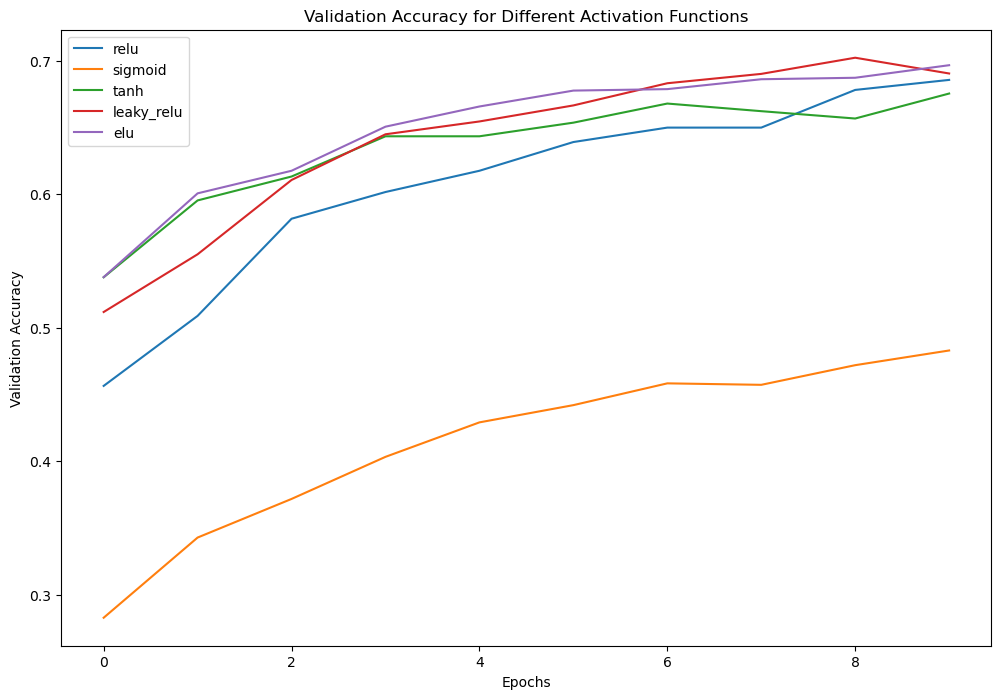

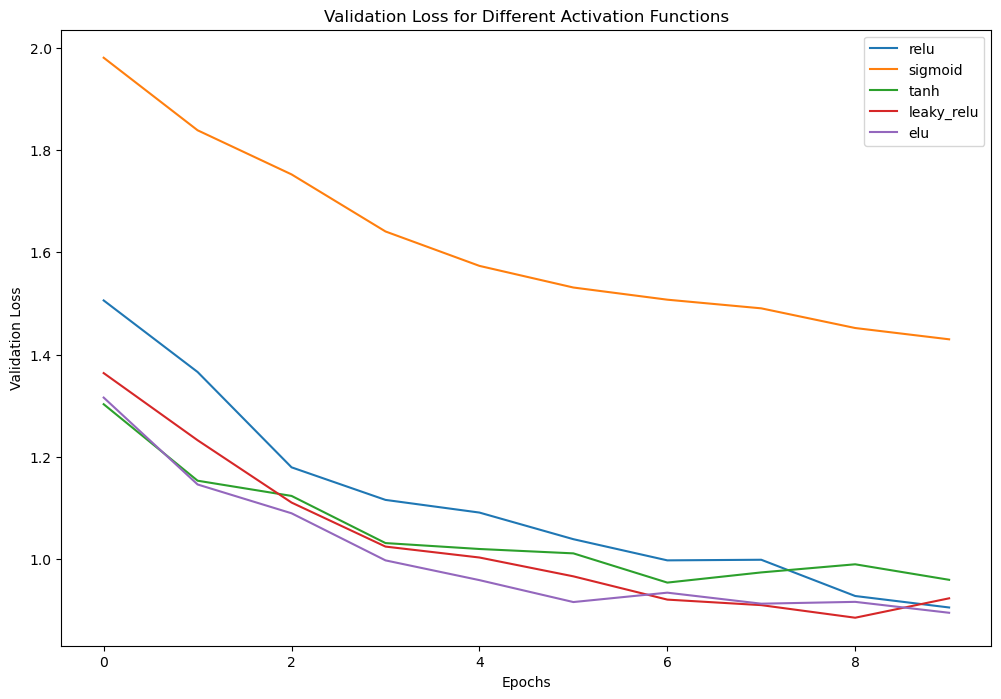

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (as a proxy for CIFAR-50)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Model creation function
def create_model(activation_fn='relu'):
    model = models.Sequential()
    
    # First Conv Layer
    model.add(layers.Conv2D(32, (3, 3), activation=activation_fn, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second Conv Layer
    model.add(layers.Conv2D(64, (3, 3), activation=activation_fn))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Third Conv Layer
    model.add(layers.Conv2D(64, (3, 3), activation=activation_fn))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the output
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(64, activation=activation_fn))
    
    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Function to train and evaluate the model
def train_and_evaluate(activation_fn):
    model = create_model(activation_fn)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_data=(x_test, y_test), verbose=2)
    return history

# Compare results for different activation functions
activations = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu']

histories = {}
for activation in activations:
    if activation == 'leaky_relu':
        histories[activation] = train_and_evaluate(layers.LeakyReLU())
    else:
        histories[activation] = train_and_evaluate(activation)

# Plotting the accuracy and loss curves for different activation functions
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(histories[activation].history['val_accuracy'], label=activation)

plt.title('Validation Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(histories[activation].history['val_loss'], label=activation)

plt.title('Validation Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
